# How to Process, Analyze and Visualize Data (II)
This is a course provided by MIT Open Course Ware.
This notebook solves Lab 2 (Exercises 1 to 4), using Python 3, which simply consists of trying out different plot methods (histogram, scatter plot, map plot) to illustrate the US Election data from 2008. The code is quite similar to the one that can be found on the course website, with little variations here and there. The main difference is the part on map plotting, which is done from scratch.

# Exercise 1
We extract donation amounts for both Obama and McCain,focusing on the majority of donations, then we plot the number of donations in $100 increments using a histogram.

In [37]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
donationsob = []
donationsmc = []
for row in reader:
    name = row['cand_nm']
    amount = float(row['contb_receipt_amt'])
    if 'Obama' in name and amount > -18000 and amount < 19000:
        donationsob.append(amount)    
    if 'McCain' in name and amount > -22000 and amount < 22000:
        donationsmc.append(amount)     

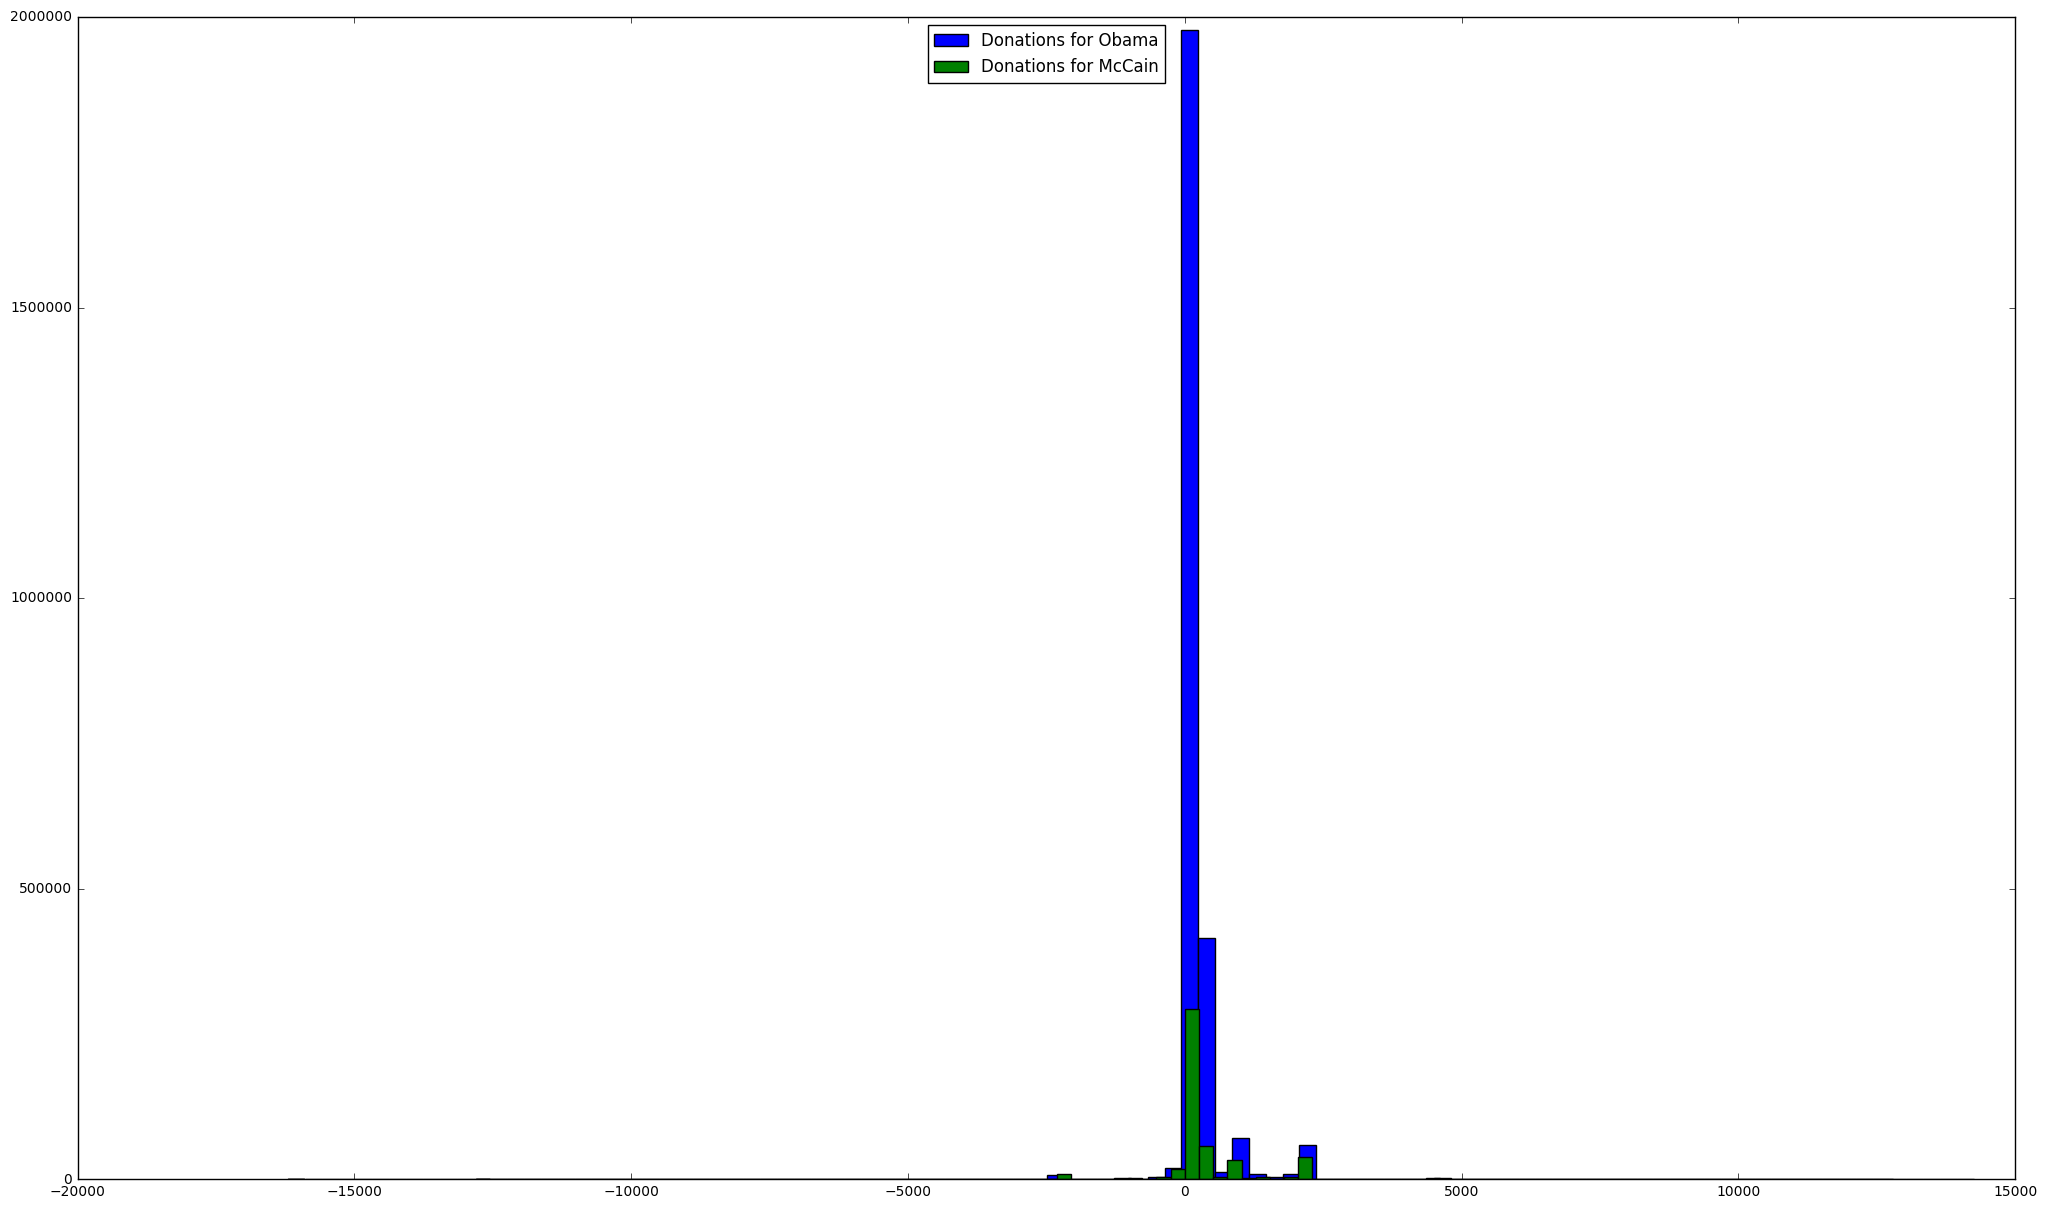

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
plt.hist(donationsob,100, label='Donations for Obama')
plt.hist(donationsmc,100, label='Donations for McCain')
plt.legend(loc='upper center', ncol = 1)
plt.show()

We extract all donations for both Obama and McCain.

In [25]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
donations_ob = []
donations_mc = []
for row in reader:
    name = row['cand_nm']
    amount = float(row['contb_receipt_amt'])
    if 'Obama' in name:
        donations_ob.append(amount)    
    if 'McCain' in name:
        donations_mc.append(amount)
sorted_ob = sorted(donations_ob)
sorted_mc = sorted(donations_mc) 

We compute the cumulative donations.

In [26]:
ob_cum = []
ob_cum.append(sorted_ob[0])
for i in range(1,len(sorted_ob)):
    ob_cum.append(ob_cum[i-1]+sorted_ob[i]) 

In [27]:
mc_cum = []
mc_cum.append(sorted_mc[0])
for i in range(1,len(sorted_mc)):
    mc_cum.append(mc_cum[i-1]+sorted_mc[i]) 

## Exercise 2
We plot the cumulative donations as a function of the donations for both candidates.

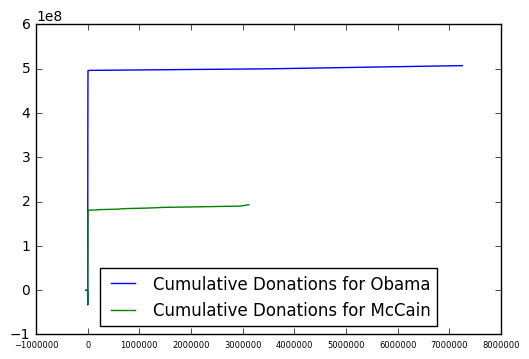

In [30]:
import matplotlib
plt.plot(sorted_ob,ob_cum, label='Cumulative Donations for Obama')
plt.plot(sorted_mc,mc_cum, label='Cumulative Donations for McCain')
plt.legend(loc='lower center', ncol = 1)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

We redo the same plot, this time focusing on the range where most donations are.

In [32]:
sorted_ob_mst = [sorted_ob[i] for i in range(0,len(sorted_ob)) if sorted_ob[i]> -18000 and sorted_ob[i] < 19000]
sorted_mc_mst = [sorted_mc[i] for i in range(0,len(sorted_mc)) if sorted_mc[i]> -22000 and sorted_mc[i] < 22000]

In [35]:
ob_cum_mst = []
ob_cum_mst.append(sorted_ob_mst[0])
for i in range(1,len(sorted_ob_mst)):
    ob_cum_mst.append(ob_cum_mst[i-1]+sorted_ob_mst[i]) 

In [36]:
mc_cum_mst = []
mc_cum_mst.append(sorted_mc_mst[0])
for i in range(1,len(sorted_mc_mst)):
    mc_cum_mst.append(mc_cum_mst[i-1]+sorted_mc_mst[i]) 

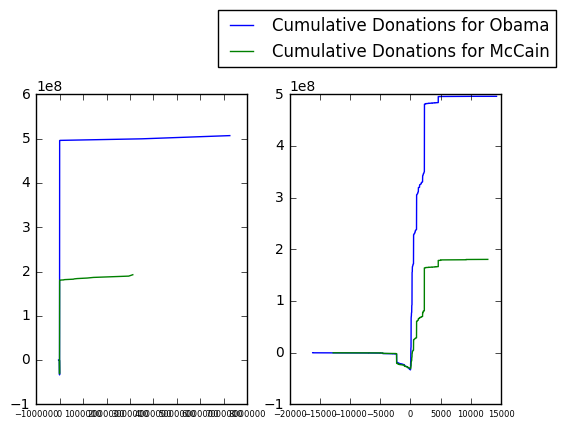

In [55]:
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.plot(sorted_ob,ob_cum)
plt.plot(sorted_mc,mc_cum)
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 

fig.add_subplot(1,2,2)
plt.plot(sorted_ob_mst,ob_cum_mst,label='Cumulative Donations for Obama')
plt.plot(sorted_mc_mst,mc_cum_mst, label='Cumulative Donations for McCain')
plt.legend(loc='upper right',ncol =1,bbox_to_anchor=(1.3, 1.3))
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 

plt.show()

We go back to looking at reattribution donations.

In [2]:
import datetime

def Spousedonations(rdr):
    #rdr is the csv file read (reader or reader_sampled)
    negdonations = []
    for row in rdr:
        name = row['cand_nm']
        amount = float(row['contb_receipt_amt'])
        desc = row['receipt_desc']
        datestr = row['contb_receipt_dt']
        date = datetime.datetime.strptime(datestr, '%d-%b-%y')
        #create a list where each entry is a row (a dictionary)
        if 'REATTRIBUTION' in desc: 
            negdonations.append([name,amount,date])
    return(negdonations)

In [3]:
import csv
reader_sampled = csv.DictReader(open('donations_samples.csv', 'r'))
neg_reader = Spousedonations(reader_sampled)

In [4]:
#sort chronologically
neg_reader.sort(key = lambda x: x[2])

Let us try to do a scatter plot.

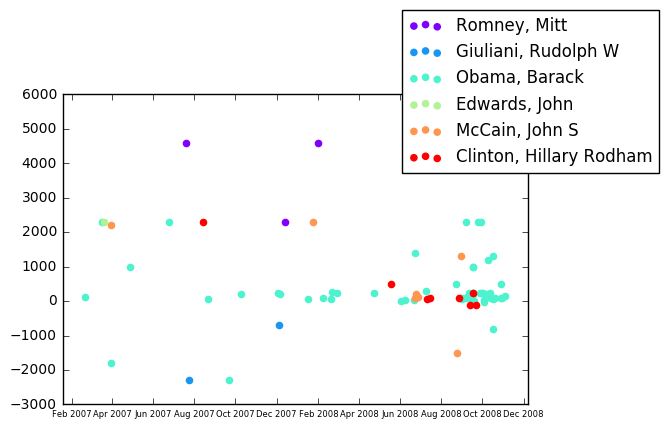

In [32]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

date_list = [item[2] for item in neg_reader]
amt_list = [item[1] for item in neg_reader]
#collects the candidate names
name_list = [item[0] for item in neg_reader]
cnd_name = list(set(name_list))
#colors
colors = iter(matplotlib.cm.rainbow(np.linspace(0, 1, len(cnd_name))))
for name in cnd_name:
    x = [date_list[i] for i in range(len(date_list)) if name_list[i]== name]
    y = [amt_list[i] for i in range(len(amt_list)) if name_list[i]== name]
    plt.scatter(x,y,color=next(colors),label = name)
plt.legend(loc='upper right',ncol =1,bbox_to_anchor=(1.3, 1.3))
#adjust x label's size
matplotlib.rc('xtick', labelsize=6) 
plt.show()

This seems to work, let us try out with the whole data.

## Exercise 3
Provide a scatter plot of the negative donations due to reattribution, with dates on the $x$-axis, amount on the $y$-axis,as a function of the candidates.

In [33]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
neg_reader_all = Spousedonations(reader)
#sort chronologically
neg_reader_all.sort(key = lambda x: x[2])

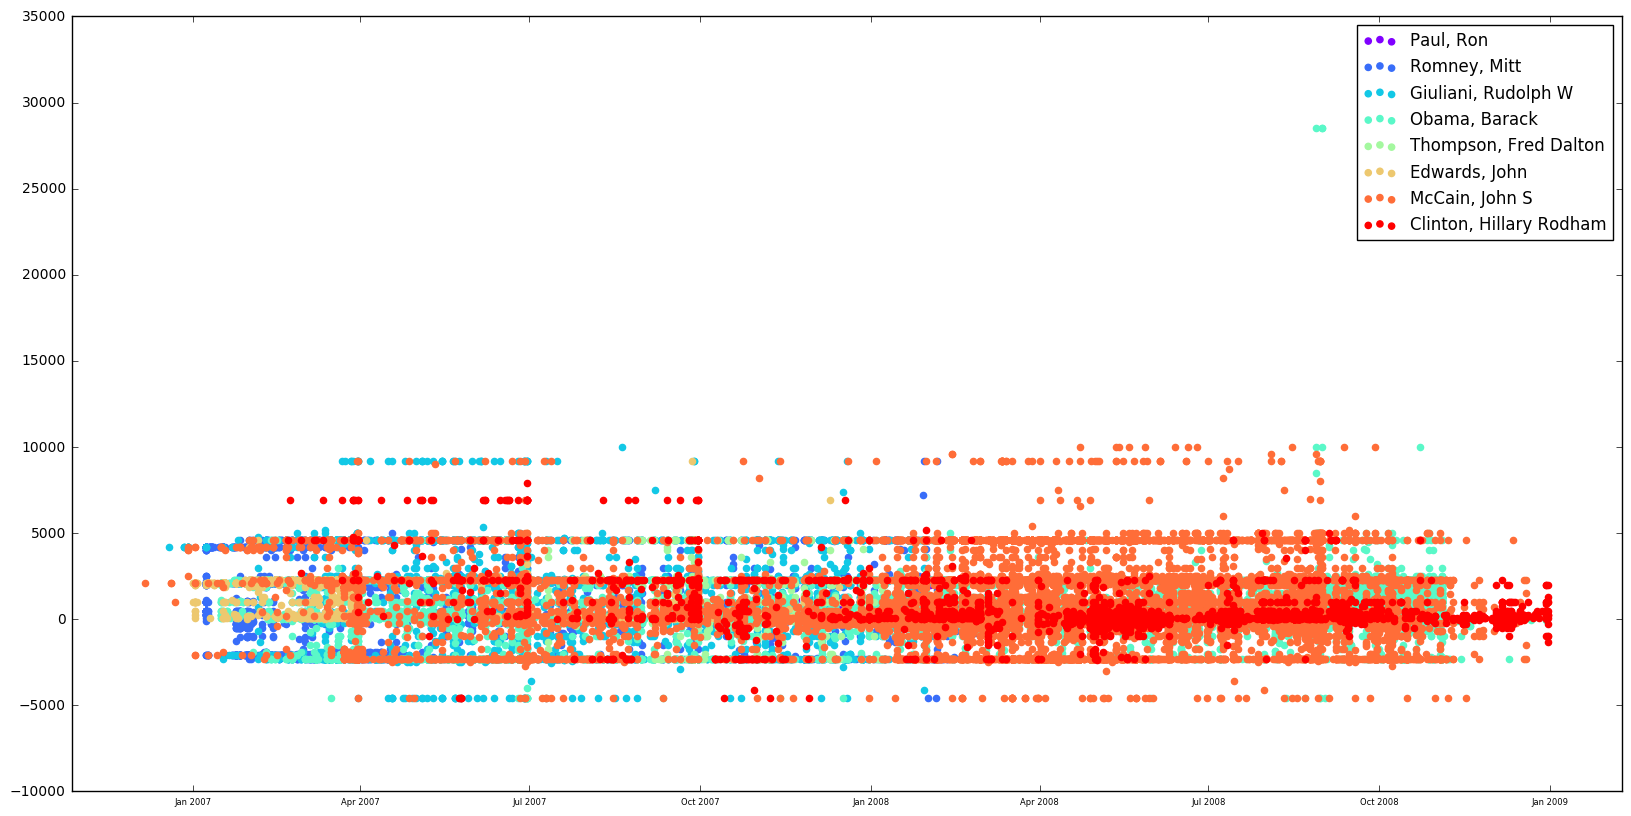

In [39]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

date_list = [item[2] for item in neg_reader_all]
amt_list = [item[1] for item in neg_reader_all]
#collects the candidate names
name_list = [item[0] for item in neg_reader_all]
cnd_name = list(set(name_list))
#colors
colors = iter(matplotlib.cm.rainbow(np.linspace(0, 1, len(cnd_name))))
plt.figure(figsize=(20,10))
for name in cnd_name:
    x = [date_list[i] for i in range(len(date_list)) if name_list[i]== name]
    y = [amt_list[i] for i in range(len(amt_list)) if name_list[i]== name]
    plt.scatter(x,y,color=next(colors),label = name)
plt.legend(loc='upper right',ncol =1)#,bbox_to_anchor=(1.3, 1.3))
#adjust x label's size
#matplotlib.rc('xtick', labelsize=6) 
plt.show()

We next figure out how to draw maps. For that, we use Basemap (to be replaced eventually by cartopy), which can be installed either via apt-get install or conda. See also the tutorial http://basemaptutorial.readthedocs.io/en/latest/projections.html.

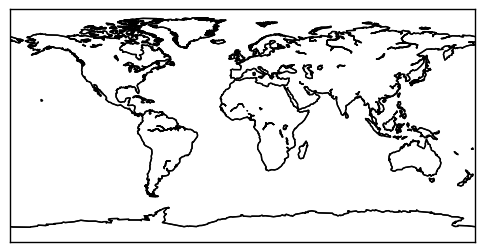

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap()
map.drawcoastlines()

plt.show()

It will be useful to remember about longitudes and latitudes. The explanation below assumes the earth is a sphere.
* Longitude is an angular measure that specifies the east-west position of a point on the earth surface. For historical reasons, the line that goes from the north pole to the south pole through the Greenwich observatory (UK) is given the longitude 0, and is called the prime meridian. Now we can visualize a plane that passes through both poles and Greenwich, imagine a door which hinges at the north and south pole, which is open in such a way that it touches Greenwich. It is at angle 0. Now take a plane that passes through both poles and the location of interest, the angle between this plane and the first one gives a longitude, we get an angle east (from 0 to 180) or west (from 0 to -180) from the prime meridian. It is like looking at how much the door has to be opened on the east or on the west to each the location.
* Latitude is an angular measure that specifices the north-south position of a point on the earth surface. The reference is the equator, which is the intersection of a plane through the centre of the earth, perpendicular to the rotation axis,  with the earth surface. To know the latitude of a point, take the angle between the filled circle given by the equator, and the vector that starts at the center of this circle and touches the location of interest. Thus the latitude of the equator is 0, that of the north pole is 90, and that of the south pole is -90.


There are about 30 different ways to project a map, see here http://matplotlib.org/basemap/users/mapsetup.html.
* The orthographic projection ('ortho') displays the earth as a satellite (in an orbit infinitely high above the earth) would see it.
* The cylindrical equidistant or equirectangular projection: it maps meridians to vertical lines, and  constant spacing between meridians yields constant spacing between vertical lines, also circles of latitude are mapped to horizontal lines, and again, constant spacing between circles of latitudes yields constant spacing between horizontal lines. This projection sends spherical coordinates to cartesian coordinates.

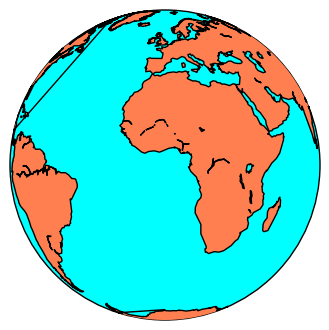

In [4]:
#this specifies the projection to be used
#the default value used above is cyl,or Cylindrical Equidistant projection (aka Equirectangular projection)
# lon_0, lat_0 are the center point of the projection (in longitude and latitude)
# Setting 0,0 means the center is the intersection of the prime meridian and of the equator
map = Basemap(projection='ortho',lat_0=0, lon_0=0)

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcoastlines()

plt.show()

If we want to zoom into a map, we need to specify the lower left corner (llcrnr) and the upper right corner (urcrnr), both in terms of longitude and latitude. For example, to capture the map of (most of) the US, a quick search online shows that to capture the tip of Texas, we need a latitude of 25, and a longitude west of 130 will get us the west coast. Then a latitude of 50 will give the border with Canada, and a longitude west of 60 will give the east coast.

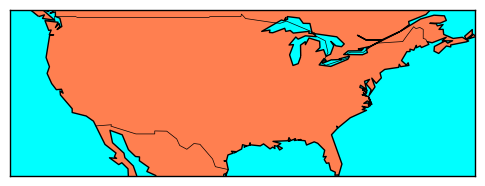

In [21]:
#specify where to zoom in
map = Basemap(llcrnrlon=-130,llcrnrlat=25,urcrnrlon=-60,urcrnrlat=50)
#fills with water
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
#draw the country boundaries
map.drawcountries()
map.drawcoastlines()

plt.show()

Now the above projection tends to preserve areas but not shape, so we can try to do the plot with instead another projection (Lambert Conformal Projection) which preserves shapes but not areas.

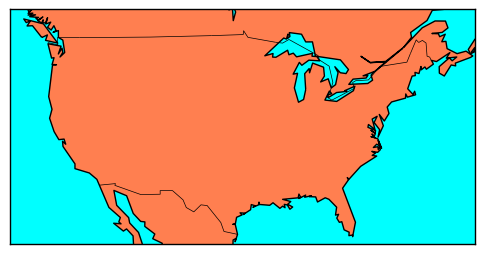

In [29]:
#use the Lambert Conformal Projection, lon_0,lat_0 is a central point.
map = Basemap(llcrnrlon=-130,llcrnrlat=25,urcrnrlon=-60,urcrnrlat=50,projection='lcc',lon_0=-120,lat_0=5)

#Fill with a blue color 
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcountries()
map.drawcoastlines()
plt.show()

Next we add shapefiles, this is useful to plot, say here, states borders.
We use the file st99_d00 that used to be on the US Census website, and is now available here:
https://github.com/matplotlib/basemap/tree/master/examples
Note that this file must be present with 3 extensions, shp, sbf and shx, for the library to work.   

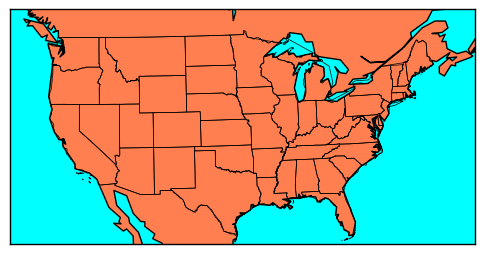

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#use the Lambert Conformal Projection, lon_0,lat_0 is a central point.
map = Basemap(llcrnrlon=-130,llcrnrlat=25,urcrnrlon=-60,urcrnrlat=50,projection='lcc',lon_0=-120,lat_0=5)

#Fill with a blue color 
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcountries()
map.drawcoastlines()

#the 2nd parameter is a name to access later to the shapefile information from the Basemap instance
map.readshapefile('st99_d00', name='states', drawbounds=True)

plt.show()

We can draw the states, but to be able to color them differently, we will need to access them, which typically is done by name. When we load the shapefile, we attached it to the name parameter "map" , so the shapes and attributes are stored as lists in map.states and map.states_info respectively.

In [33]:
map.states_info[0]

{'AREA': '2.71254383622068E+02',
 'DIVISION': '9',
 'LSAD': '01',
 'LSAD_TRANS': b'                                                  ',
 'NAME': 'Alaska',
 'PERIMETER': '2.27171421517178E+02',
 'REGION': '4',
 'RINGNUM': 1,
 'SHAPENUM': 1,
 'ST99_D00_': 2,
 'ST99_D00_I': 1,
 'STATE': '02'}

We extract the names from states_info and color a particular state using its name.

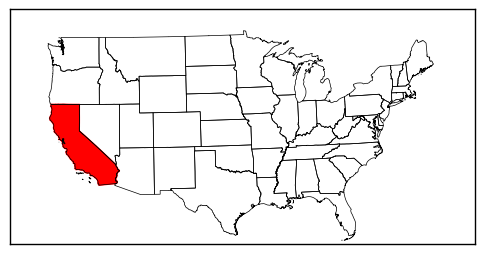

In [8]:
from matplotlib.patches import Polygon

#use the Lambert Conformal Projection, lon_0,lat_0 is a central point.
map = Basemap(llcrnrlon=-130,llcrnrlat=25,urcrnrlon=-60,urcrnrlat=50,projection='lcc',lon_0=-120,lat_0=5)

#the 2nd parameter is a name to access later to the shapefile information from the Basemap instance
map.readshapefile('st99_d00', name='states', drawbounds=True)

#we extract the names for the attributes
state_names = []
for entry in map.states_info:
    state_names.append(entry['NAME'])

# get current axes 
ax = plt.gca() 

# get Texas and draw the filled polygon
seg = map.states[state_names.index('California')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()

It can be useful to link state names and abbreviations, since the election data uses abbreviations.
See https://gist.github.com/rogerallen/1583593 for a dictionary in python that maps name and abbreviations.

In [15]:
#load the file and access the content
import us_state_abbrev
us_state_abbrev.us_state_abbrev

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY'}

Let us go back to election data. We extract donations per candidate and states.

In [1]:
import us_state_abbrev

def Statedonations(rdr,cd_name):
    #rdr is the csv file read (reader or reader_sampled)
    donations = []
    for row in rdr:
        name = row['cand_nm']
        amount = float(row['contb_receipt_amt'])
        #extracts donations per candidate
        if cd_name in name: # and amount > 0:
            state = row['contbr_st']
            #create a list where each entry is a list, comprising the amount of donation and the state
            donations.append([amount,state])
    #collects the list of states where donations were made
    list_state = list(set([entry[1] for entry in donations]))
    #swap state name to abbreviation, to get abbreviation to state name
    abbrev_to_state = {v:k for k,v in us_state_abbrev.us_state_abbrev.items()}
    
    st_donation = {}
    #create a dictionary, keys are state names, and value are the donations for this state
    for st in list_state:
        this_st_donation = [entry[0] for entry in donations if entry[1] == st]
        #.get gives "none" if the key is not found, e.g., the state name is not valid
        st_donation.update({abbrev_to_state.get(st):sum(this_st_donation)})
    return(st_donation)

In [2]:
import csv
reader_sample = csv.DictReader(open('donations_samples.csv', 'r'))
stdonationsob = Statedonations(reader_sample,'Obama')

In [3]:
stdonationsob

{'Delaware': 1066.6,
 'South Carolina': 744.96,
 'Tennessee': 2400.16,
 'Virginia': 14855.58,
 'Wisconsin': 1474.06,
 'Hawaii': 2377.79,
 'Louisiana': 490.0,
 'Mississippi': 500.0,
 'Nebraska': 3040.0,
 'Vermont': 5015.0,
 'Oregon': 3794.14,
 'New York': 49239.77,
 'Nevada': 6840.54,
 'Maine': 3305.0,
 'Iowa': 2215.63,
 'Montana': 755.0,
 'Rhode Island': 1938.2,
 'Florida': 19234.48,
 'Wyoming': 346.0,
 'New Jersey': 14297.89,
 'New Mexico': 4904.1900000000005,
 'Missouri': 3997.25,
 'Kansas': 2330.5,
 'Indiana': 1987.95,
 'North Dakota': 200.0,
 'Washington': 14826.279999999999,
 'North Carolina': 5662.9800000000005,
 'Arizona': 6900.88,
 'Arkansas': 2445.0,
 'Ohio': 6188.070000000001,
 'Massachusetts': 28072.77,
 'Pennsylvania': 11993.289999999999,
 'Colorado': 11807.74,
 'South Dakota': 50.0,
 'Illinois': 39521.04,
 'Alabama': 2117.29,
 'Alaska': 900.0,
 'Kentucky': 1445.95,
 'Maryland': 11366.310000000001,
 'Minnesota': 7707.68,
 'New Hampshire': 1421.52,
 None: 2100.0,
 'Texas': 1

We are now left with plotting the donations per state data.

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def Plotstatedonations(donations):
    #use the Lambert Conformal Projection to plot US map
    map = Basemap(llcrnrlon=-130,llcrnrlat=25,urcrnrlon=-60,urcrnrlat=50,projection='lcc',lon_0=-120,lat_0=5)

    #load the shapefile information
    map.readshapefile('st99_d00', name='states', drawbounds=True)
    
    # choose a color for each state donations
    colors={}
    # choose colormap to be Reds
    cmap = plt.cm.Reds
    dmax = max(donations.values())
    
    state_names = []
    #loop over every state (probably a bit redundant)
    for entry in map.states_info:
        state_name = entry['NAME']
        donation = donations.get(state_name,0)
        #sqrt spreads the colors differently
        colors[state_name] = cmap(np.sqrt(donation/dmax))
        state_names.append(state_name)

    # get current axes instance
    ax = plt.gca() 
    for nshape,seg in enumerate(map.states):
        color = colors[state_names[nshape]]
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

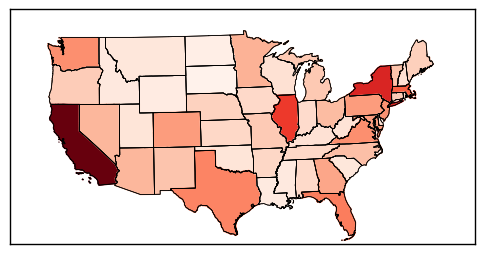

In [19]:
Plotstatedonations(stdonationsob)
plt.show()

## Exercise 4
We need a figure where each subgraph plots the total amount of per-state donations to a candidate.

In [20]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
stdonationsob = Statedonations(reader,'Obama')

In [21]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
stdonationsmc = Statedonations(reader,'McCain')

In [24]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
stdonationshc = Statedonations(reader,'Clinton')

In [27]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))
stdonationsmr = Statedonations(reader,'Romney')

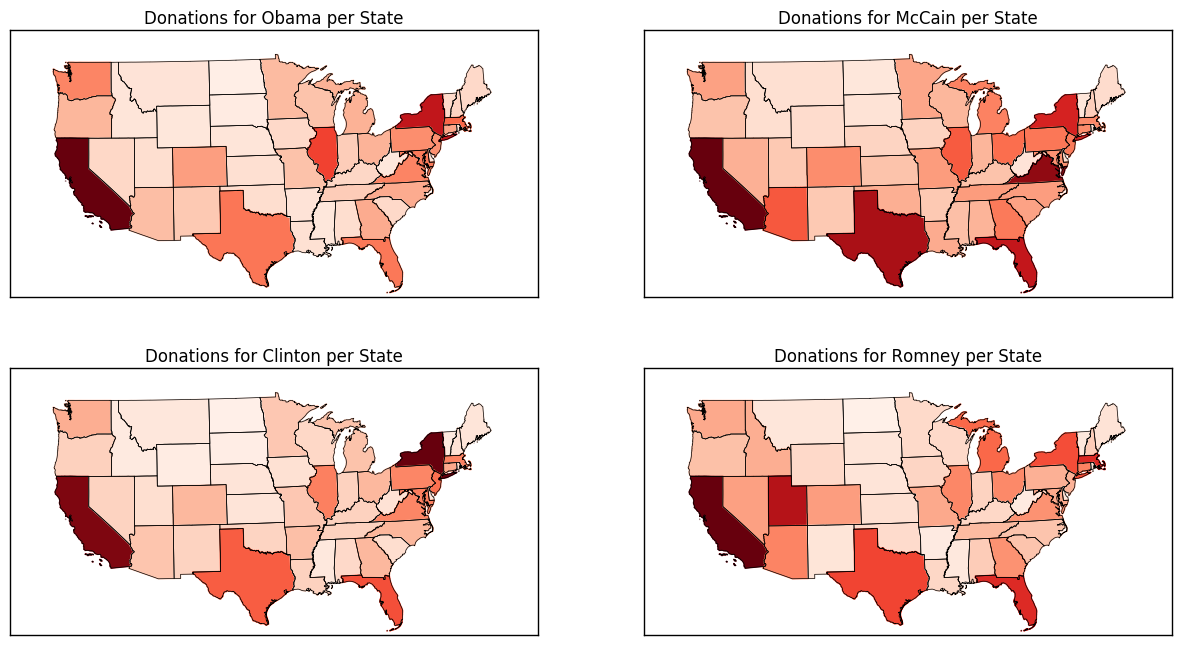

In [31]:
fig = plt.figure(figsize=(15,8))

fig.add_subplot(2,2,1)
Plotstatedonations(stdonationsob)
plt.title('Donations for Obama per State')

fig.add_subplot(2,2,2)
Plotstatedonations(stdonationsmc)
plt.title('Donations for McCain per State')

fig.add_subplot(2,2,3)
Plotstatedonations(stdonationshc)
plt.title('Donations for Clinton per State')

fig.add_subplot(2,2,4)
Plotstatedonations(stdonationsmr)
plt.title('Donations for Romney per State')

plt.show()